# 5012 HW #2. Improve code Efficiency: Sort First!

## Scenario. 

In a two class, classification problem, it is common to use a classifier that outputs confidences (rather than simply class labels). A good example of this is a Support Vector Machine. A pro for using such a classifier is that you gain more information -- specifically the confidence in the classification result. A con is that in order to make a final classification decision, a threshold value must be determined. For example, if a threshold of 0.75 is chosen, the class label 1 would be assigned for confidences greater than 0.75 and for confidences less than 0.75 a class label of 0 would be assigned. However, this begs the question: how is the threshold chosen?

Many data scientists will choose a threshold based on the experimental results and/or operational constraints. In this code example, we assume that we have confidences and true labels for a large data set. To determine a good threshold we will compute the true positive rates (TPRs) and false positive rates (FPRs) at all relevant thresholds. The relevant thresholds are considered those that would change the TPRs and FPRs. 

In the code below, a function is defined to compute the TPR and FPR at all relevant thresholds. However, the code is not very efficient and can be improved. (Note there are tips and hints found in the comments.) 

Your task is the following:

## Question 1
**40 POINTS**  
Assess the time complexity of the method computeAllTPRs(...). Provide a line-by-line assessment in comments identifying the proportional number of steps (bounding notation is sufficient) per line: eg, O(1), O(log n), O(n), etc. Also, derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 2
**30 POINTS**  
Implement a new function computeAllTPRs_improved(...) which performs the same task as computeAllTPRs but has a significantly reduced time complexity. Also provide a line-by-line assessment in comments identifying the proportional number of steps per line, and derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 3
**30 POINTS**  
Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).  

**NOTE: Do not include runtimes for graphing**

**TOTAL POINTS: 100**

---

In [1]:
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from numpy import argmax
import time
import random
import numpy as np

Answer Question #1 in the comments of the code chunk below. 

In [2]:
    def computeAllTPRs(true_label, confs): ## O(1), c1
        '''

        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables
        sentinelValue = -1 # used to replace max value found thus far ## O(1), c2
        totalPositives = sum(true_label) ## O(1), c3
        totalNegatives = len(true_label) - totalPositives ## O(1), c4
        #print(true_label)
        truePositives = 0 ## O(1), c5
        falsePositives = 0 ## O(1), c6
        # Hint: Consider Memory Management
        truePositiveRate = [] ## O(1), c7
        falsePositiveRate = [] ## O(1), c8

        #Hint: Although not explicitly clear, the loop structure below is an 
            #embeded loop ie, O(n^2) ... do you see why??
        #Hint: If you sort the confidences first you can improve the iteration scheme.
        
        # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
        # append to truePositiveRate , falsePositiveRate lists. 

        for i in range(len(confs)): ## O(n), c9*n
          maxVal = max(confs)  # Hint: the max method does NOT run in O(1) ## O(n^2), c10*n*n
          argMax = argmax(confs) ## O(n^2), c11*n*n
          confs[argMax] = sentinelValue ## O(1), c12*n
          #print(argMax)
          if true_label[argMax]==1: 
            truePositives += 1 ## O(1), c13*n
          else:
            falsePositives += 1 ## O(1), c14*n

          truePositiveRate.append(truePositives/totalPositives) ## O(1), c15*n
          falsePositiveRate.append(falsePositives/totalNegatives) ## O(1), c16*n
          #print(truePositiveRate)

        # Plot FPR vs TPR for all possible thresholds 
        plt.plot(falsePositiveRate,truePositiveRate, label ='class ' + str(i) + ' to all') ## O(1), c17
        plt.legend() ## O(1), c18
        plt.title("Inefficient")
        plt.xlabel('False Positive Rate') ## O(1), c19
        plt.ylabel('True Positive Rate') ## O(1), c20
        plt.show() ## O(1), c21


T(n) = c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 + (c9n + c10n2 + c11n2 + c12n + c13n + c14n + c15n + c16n) + c17 + c18 + c20 + c21
     
     = c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 + c17 + c18 + c20 + c21 + ((c10 + c11)n2 + (c9 + c12 + c13 + c14 + c15 + c16)n))
     
     = c22 + (c23n2 + c24n)
So T(n) is O(n^2)

Below, provide your implementation for Question #2.

In [3]:
    def computeAllTPRs_improved(true_label, confs): ## O(1), c1
        '''

        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables
        sentinelValue = -1 # used to replace max value found thus far ## O(1), c2
        totalPositives = sum(true_label) ## O(1), c3
        totalNegatives = len(true_label) - totalPositives ## O(1), c4
        #print(true_label)
        truePositives = 0 ## O(1), c5
        falsePositives = 0 ## O(1), c6
        # Hint: Consider Memory Management
        truePositiveRate = [] ## O(1), c7
        falsePositiveRate = [] ## O(1), c8

        #Hint: Although not explicitly clear, the loop structure below is an 
            #embeded loop ie, O(n^2) ... do you see why??
        #Hint: If you sort the confidences first you can improve the iteration scheme.
        
        # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
        # append to truePositiveRate , falsePositiveRate lists. 
        confs.sort(reverse=True) ## O(n*logn), c9*n*logn
        true_label.sort(reverse=True) ## O(n*logn), c10*n*logn

        for i in range(len(confs)): ## O(n), c11*n
          argMax = i ## O(1), c12*n
          confs[argMax] = sentinelValue ## O(1), c13*n
          #print(argMax)
          if true_label[argMax]==1: 
            truePositives += 1 ## O(1), c14*n
          else:
            falsePositives += 1 ## O(1), c15*n

          truePositiveRate.append(truePositives/totalPositives) ## O(1), c16*n
          falsePositiveRate.append(falsePositives/totalNegatives) ## O(1), c17*n
          #print(truePositiveRate)

        # Plot FPR vs TPR for all possible thresholds 
        plt.plot(falsePositiveRate,truePositiveRate, label ='class ' + str(i) + ' to all') ## O(1), c18
        plt.legend() ## O(1), c19
        plt.title("Improved")
        plt.xlabel('False Positive Rate') ## O(1), c20
        plt.ylabel('True Positive Rate') ## O(1), c21
        plt.show() ## O(1), c22


T(n) = c1+c2+c3+c4+c5+c6+c7+c8+c9n(logn)+c10n(logn)+(c11+c12+c13+c14+c15+c16+c17)n+c18+c19+c20+c21+c22

     = c23+c4n*logn+c25n

Therefore, the T(n) is nlogn.

Question #3. Below, provide your code which records and plots the runtime for the original and improved methods. 

In [4]:
def testComputeAllTPRs_improved(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  #numSamples = 10000
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5: 
      lab = 1 
    else: 
      lab = 0
    labels.append(lab)
  #print(labels)
  computeAllTPRs_improved(labels, deepcopy(confList))  # Why a deepcopy here?

In [5]:
def testComputeAllTPRs(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  #numSamples = 10000
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5: 
      lab = 1 
    else: 
      lab = 0
    labels.append(lab)
  #print(labels)
  computeAllTPRs(labels, deepcopy(confList))  # Why a deepcopy here?

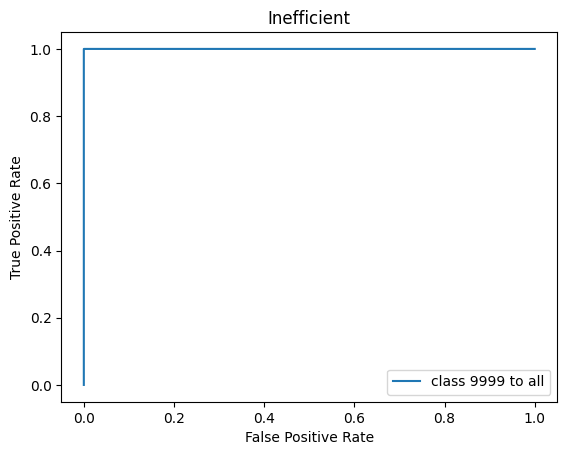

12.976861299946904


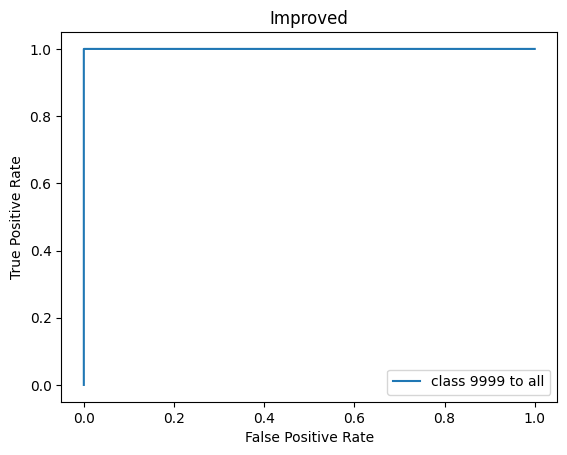

0.3397446000017226


In [6]:
## record the time results
slow = []
improved  = []

numSamps = 10000
start = time.perf_counter()
testComputeAllTPRs(numSamps)
print(time.perf_counter() - start)
    
## do the improved compute
start = time.perf_counter()
testComputeAllTPRs_improved(numSamps)
print(time.perf_counter() - start)

If I run both multiple times ...

In [7]:
    def computeAllTPRs(true_label, confs): ## O(1), c1
        '''

        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables
        sentinelValue = -1 # used to replace max value found thus far ## O(1), c2
        totalPositives = sum(true_label) ## O(1), c3
        totalNegatives = len(true_label) - totalPositives ## O(1), c4
        #print(true_label)
        truePositives = 0 ## O(1), c5
        falsePositives = 0 ## O(1), c6
        # Hint: Consider Memory Management
        truePositiveRate = [] ## O(1), c7
        falsePositiveRate = [] ## O(1), c8

        #Hint: Although not explicitly clear, the loop structure below is an 
            #embeded loop ie, O(n^2) ... do you see why??
        #Hint: If you sort the confidences first you can improve the iteration scheme.
        
        # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
        # append to truePositiveRate , falsePositiveRate lists. 

        for i in range(len(confs)): ## O(n), c9*n
          maxVal = max(confs)  # Hint: the max method does NOT run in O(1) ## O(n^2), c10*n*n
          argMax = argmax(confs) ## O(n^2), c11*n*n
          confs[argMax] = sentinelValue ## O(1), c12*n
          #print(argMax)
          if true_label[argMax]==1: 
            truePositives += 1 ## O(1), c13*n
          else:
            falsePositives += 1 ## O(1), c14*n

          truePositiveRate.append(truePositives/totalPositives) ## O(1), c15*n
          falsePositiveRate.append(falsePositives/totalNegatives) ## O(1), c16*n

In [8]:
    def computeAllTPRs_improved(true_label, confs): ## O(1), c1
        '''

        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables
        sentinelValue = -1 # used to replace max value found thus far ## O(1), c2
        totalPositives = sum(true_label) ## O(1), c3
        totalNegatives = len(true_label) - totalPositives ## O(1), c4
        #print(true_label)
        truePositives = 0 ## O(1), c5
        falsePositives = 0 ## O(1), c6
        # Hint: Consider Memory Management
        truePositiveRate = [] ## O(1), c7
        falsePositiveRate = [] ## O(1), c8

        #Hint: Although not explicitly clear, the loop structure below is an 
            #embeded loop ie, O(n^2) ... do you see why??
        #Hint: If you sort the confidences first you can improve the iteration scheme.
        
        # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
        # append to truePositiveRate , falsePositiveRate lists. 
        confs.sort(reverse=True) ## O(n*logn), c9*n*logn
        true_label.sort(reverse=True) ## O(n*logn), c10*n*logn

        for i in range(len(confs)): ## O(n), c10*n
          argMax = i ## O(1), c12*n
          confs[argMax] = sentinelValue ## O(1), c13*n
          #print(argMax)
          if true_label[argMax]==1: 
            truePositives += 1 ## O(1), c14*n
          else:
            falsePositives += 1 ## O(1), c15*n

          truePositiveRate.append(truePositives/totalPositives) ## O(1), c16*n
          falsePositiveRate.append(falsePositives/totalNegatives) ## O(1), c17*n

Text(0, 0.5, 'Time')

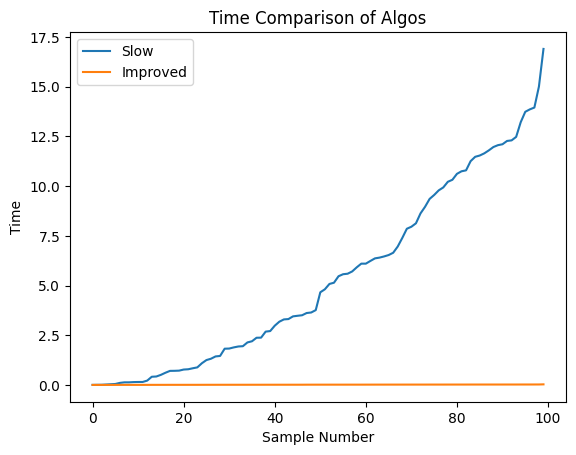

In [9]:
slow = []
improved  = []

numSamps = np.random.randint(10,10000,size=100, dtype=int)
size = 100
## calculate the time required to sort various size lists
for i in range(0, size):
    numSamp = numSamps[i]
    ## do the inefficient method
    start = time.perf_counter()
    testComputeAllTPRs(numSamp)
    slow.append(time.perf_counter() - start)
    
    ## do the improved method
    start = time.perf_counter()
    testComputeAllTPRs_improved(numSamp)
    improved.append(time.perf_counter() - start)

    

stepSize = 10
slow.sort()
improved.sort()
## plot the results
plt.plot(range(0, size), slow, label = 'Slow')
plt.plot(range(0, size), improved, label = 'Improved')
#plt.plot(range(0, size, stepSize), defaultTime, label = 'Default')
plt.legend(frameon = 'none')
plt.title('Time Comparison of Algos')
plt.xlabel('Sample Number')
plt.ylabel('Time')